# Machine Learning with Python

Collaboratory workshop, 02/21/2018

This is a notebook developed throughout the first day of the Collaboratory Workshop, Machine Learning with Python. For more information, go to the workshop home page:

https://github.com/QCB-Collaboratory/W17.MachineLearning/wiki/Day-2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Loading the synthetic data

You can download this data in our [wiki](https://github.com/QCB-Collaboratory/W17.MachineLearning/wiki/Day-2), or using this [direct link](https://github.com/QCB-Collaboratory/W17.MachineLearning/raw/master/materials/day_2/Day2_testdataset.zip). After downloading, move the file to the same place where you are running your notebook and unzip it. You should now have two files: 

* ```CollML_testdataset_features.dat```: contains feature values for each sample
* ```CollML_testdataset_labels.dat```: contains the class of each sample

In [2]:
features_original = np.loadtxt('CollML_testdataset_features.dat')
labels_original = np.loadtxt('CollML_testdataset_labels.dat')

In [3]:
print("Shape of features", features_original.shape)
print("Shape of labels", labels_original.shape)

Shape of features (500, 2)
Shape of labels (500,)


In [4]:
np.unique(labels_original)   ## shows unique values in an array

array([ 0.,  1.])

We want to create a classifier that reproduces the labels in the NumPy array _labels_ based on _features_. Based on the shapes shown above, we have 2 features, and 500 samples.

## Testing/Training datatset

In [5]:
from sklearn.model_selection import train_test_split

features, features_test, labels, labels_test = train_test_split( 
                features_original, labels_original, test_size=0.2,
                shuffle=False)

In [7]:
print("Shape of the whole dataset",features_original.shape)
print("Shape of the train dataset",features.shape)
print("Shape of the test dataset",features_test.shape)

Shape of the whole dataset (500, 2)
Shape of the train dataset (400, 2)
Shape of the test dataset (100, 2)


## Visualization

Let's start by visualizing this dataset.

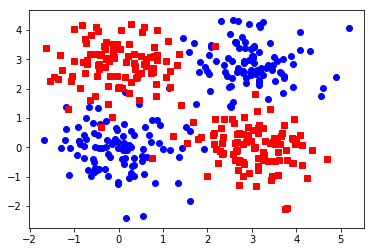

In [8]:
plt.plot( features[ labels == 0, 0 ], features[ labels == 0, 1 ], 'bo'  )
plt.plot( features[ labels == 1, 0 ], features[ labels == 1, 1 ], 'rs'  )
plt.show()

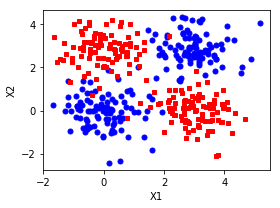

In [9]:
## Re-doing the previous plot, but with more details
plt.figure( figsize=(4,3) )
plt.plot( features[ labels == 0, 0 ], features[ labels == 0, 1 ], 'o',
           markersize=5, color='b')
plt.plot( features[ labels == 1, 0 ], features[ labels == 1, 1 ], 's',
           markersize=4, color='r')

plt.xlabel('X1')
plt.ylabel('X2')
plt.tight_layout()
plt.savefig('SyntheticDataset.png', dpi=500)
plt.show()

## Decision Trees  - Synthetic data

Let's start creating our Decision Tree classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

Variable _clf_ will contain all information learned by the classifier. To perform the learning step, we use the method _fit_:

In [11]:
clf.fit( features, labels )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

To find the accuracy of this classifier, we can use the method _score_.

In [12]:
clf.score( features, labels )

1.0

That means that our classifier was able to perfectly reproduce all points.

In [13]:
from sklearn.tree import export_graphviz
export_graphviz( clf, 'Graph_DecisionTree_testdataset.dat' )

Feature ranking by Gini Importance

In [14]:
clf.feature_importances_

array([ 0.34556301,  0.65443699])

Looking at the plot, we know that the point $P_1 = [-1,-1]$ should be of class 0 (zero), and the point $P_2 = [-1,4]$ should belong to class 1. Let's Check the classifier's prediction:

In [15]:
P1 = np.array([[-1,-1]])
P2 = np.array([[-1,4]])

print("Prediction for P1: ", clf.predict(P1))
print("Prediction for P2: ", clf.predict(P2))

Prediction for P1:  [ 0.]
Prediction for P2:  [ 1.]


**Question:** Why did we use [[ and ]] in the previous cell?

You can also check the probability that a given point belongs to a class:

In [16]:
print("Probability for P1: ", clf.predict_proba(P1))
print("Probability for P2: ", clf.predict_proba(P2))

Probability for P1:  [[ 1.  0.]]
Probability for P2:  [[ 0.  1.]]


Next, let's investigate the "decision boundaries" -- i.e. the boundary between classes

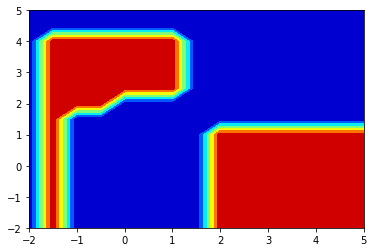

In [17]:
delta = 0.5
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))

plt.show()

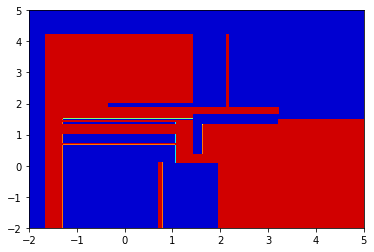

In [18]:
delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))

plt.show()

Let's use some of the meta-parameters available in SK-learn to modify the learning process.

In [25]:
clf = DecisionTreeClassifier( max_depth = 5 )
clf.fit( features, labels )
print( clf.score( features, labels ) )
export_graphviz( clf, 'Graph_DecisionTree_testdataset_2.dat' )

0.8225


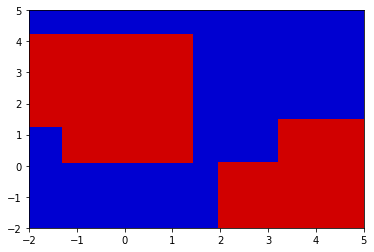

In [26]:
delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))
plt.xlim(-2, 5)
plt.ylim(-2, 5)


plt.show()

# Random forests

Random forests are among the most important models in Machine Learning, especially for applications that demand low latency.

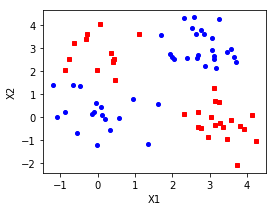

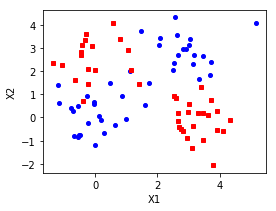

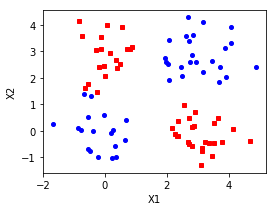

In [27]:
# plot example of sampled data:
np.random.seed(0)  # the random seed, to be sure that you always plot the same thing

for i in range (3):
    plt.figure( figsize=(4,3) )
    
    choice = np.random.random(size=len(labels))>0.8
    plt.plot( features[ np.logical_and(choice , labels == 0), 0 ], features[ np.logical_and(choice , labels == 0), 1 ], 'o',
               markersize=4, color='b')
    plt.plot( features[ np.logical_and(choice , labels == 1), 0 ], features[ np.logical_and(choice , labels == 1), 1 ], 's',
               markersize=4, color='r')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf = RandomForestClassifier( n_estimators = 50, 
                            max_depth =5, oob_score = True )
clf.fit( features, labels )
print("Out of bag score",clf.oob_score_)

Out of bag score 0.94


In [31]:
print("Accuracy score: ",clf.score(features,labels))
print("Features importance: ",clf.feature_importances_)

Accuracy score:  0.9725
Features importance:  [ 0.49759437  0.50240563]


In [32]:
print("Prediction for P1: ", clf.predict(P1))
print("Prediction for P2: ", clf.predict(P2))

Prediction for P1:  [ 0.]
Prediction for P2:  [ 1.]


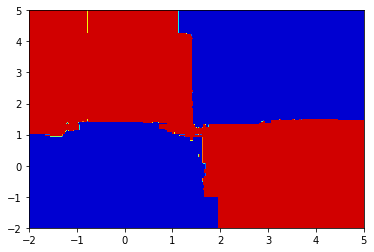

In [34]:
delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))
plt.xlim(-2, 5)
plt.ylim(-2, 5)

plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
clf = RandomForestClassifier( n_estimators = 50, 
                        max_depth =5, oob_score = True )
clf.fit( features, labels )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [37]:
print("Accuracy score: ",
          clf.score(features,labels))

Accuracy score:  0.9775


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, clf.predict(features))

0.97750000000000004

Because random forests are ensembles of decision trees, there is a way to accesss the trees and inspect them closely. To do so, use the attribute ```estimators_``` of your model.

In [27]:
clf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1483546014, splitter='best')

Let's check how to visualize trees in the random forest model we just created.

In [28]:
export_graphviz( clf.estimators_[0], 
                'Graph_DecisionTree_testdataset_RF0.dat' )

## AdaBoost

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
clf_gb = GradientBoostingClassifier(learning_rate=1.5, n_estimators=100)
clf_gb.fit( features, labels )
clf_gb.score(features, labels)

0.98499999999999999

In [41]:
clf_gb.feature_importances_

array([ 0.49205983,  0.50794017])

In [42]:
print("Prediction for P1: ", clf_gb.predict(P1))
print("Prediction for P2: ", clf_gb.predict(P2))

Prediction for P1:  [ 0.]
Prediction for P2:  [ 1.]


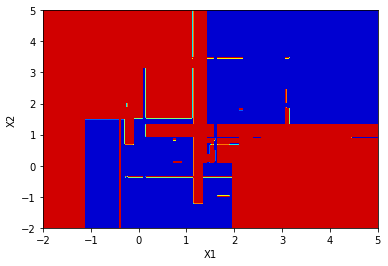

In [43]:
delta = 0.01
x     = np.arange(-2.0, 5.001, delta)
y     = np.arange(-2.0, 5.001, delta)

X, Y = np.meshgrid(x, y)
Z    = clf_gb.predict( np.c_[X.ravel(), Y.ravel()] )
Z    = Z.reshape( X.shape )

plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))
plt.xlim(-2, 5)
plt.ylim(-2, 5)

plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

# Support Vector Machines

Support Vector Machines (or SVMs) were for a long time the most widely used model in the Machine Learning community.

In [44]:
from sklearn.svm import SVC

In [45]:
clf = SVC()
clf.fit( features, labels )
print( clf.score( features, labels ) )

0.96


/home/dessalles/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
clf = SVC(gamma=10000.)
clf.fit( features, labels )
print( clf.score( features, labels ) )

1.0


Let's write a function that automatically draws the decision boundaries for us (this avoids too much replication of code).

In [47]:
def plotContours(clf, figname, delta = 0.01):
    
    x     = np.arange(-2.0, 5.001, delta)
    y     = np.arange(-2.0, 5.001, delta)

    X, Y = np.meshgrid(x, y)
    Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
    Z    = Z.reshape( X.shape )

    plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))
    plt.xlim(-2, 5)
    plt.ylim(-2, 5)

    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.tight_layout()
    plt.savefig(figname, dpi=500)
    plt.show()
    
    return

/home/dessalles/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


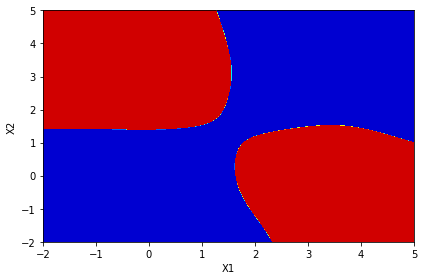

In [48]:
clf = SVC()
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundary1.png')

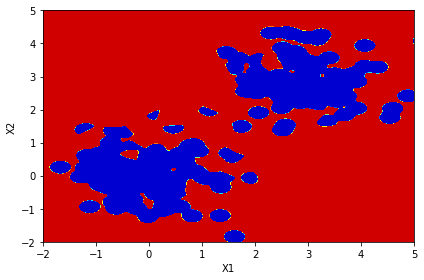

In [49]:
clf = SVC( C = 1000., gamma = 100. )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundaryC100g100.png')

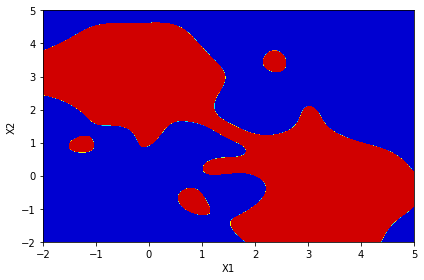

In [50]:
clf = SVC( C = 1000 ,gamma = 1)
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundary_C1000.png')

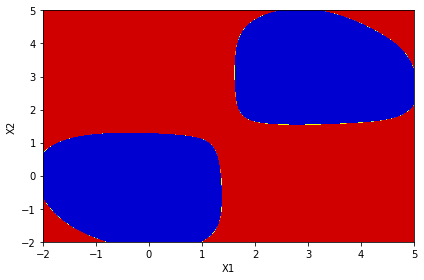

In [55]:
clf = SVC( C = 0.02 ,gamma = 1 )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundaryC01.png')

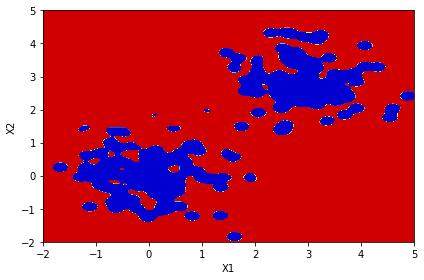

In [56]:
clf = SVC( C = 0.5, gamma = 70. )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundaryC01g100.png')

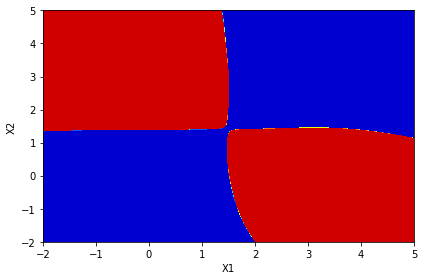

In [57]:
clf = SVC( C = 0.1, gamma = 1. )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundaryC001g1.png')

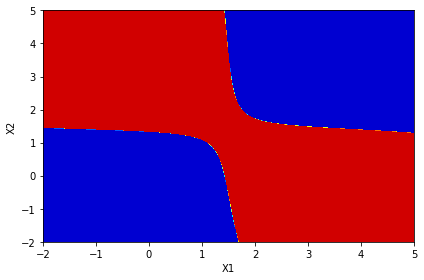

In [58]:
clf = SVC( C = 0.1, gamma = 0.1 )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundaryC001g01.png')

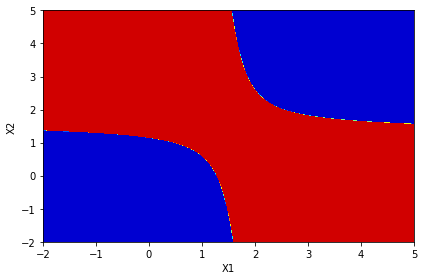

In [59]:
clf = SVC( C = 1, gamma = 0.01 )
clf.fit( features, labels )
plotContours(clf, 'SVC_decisionboundary1.png')

# Train-Test split

Next, we will 

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split( 
        features, labels, test_size=0.33,shuffle=False)

In [62]:
print("Shape of the train dataset: ", X_train.shape)
print("Shape of the validation dataset: ", X_valid.shape)

Shape of the train dataset:  (268, 2)
Shape of the validation dataset:  (132, 2)


In [64]:
clf = SVC( C = 0.001, gamma = 10. )
clf.fit( X_train, Y_train )
clf.score(X_valid, Y_valid)

0.51515151515151514

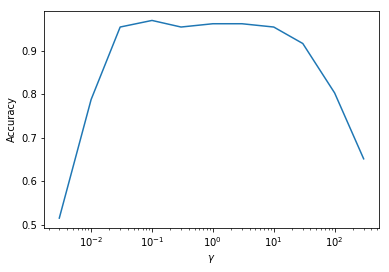

In [65]:
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

accuracies = []
for gamma in setGammas:
    clf = SVC( C = 1., gamma = gamma )
    clf.fit( X_train, Y_train )
    accuracies.append( clf.score(X_valid, Y_valid) )

plt.plot(setGammas, accuracies)

plt.ylabel(r'Accuracy')
plt.xlabel(r'$\gamma$')
plt.xscale('log')

plt.savefig('SVM_accuracyvsgamma_syntheticdata.png', dpi=500)
plt.show()

Because there is the splitting is performed at random, to properly estimate accuracy you should perform the train-test splitting several times.

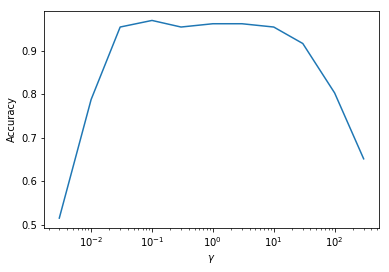

In [66]:
numRepetitions = 200
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

accuracies = np.zeros( setGammas.shape )

for j in range(numRepetitions):
    k = 0
    for gamma in setGammas:
        clf = SVC( C = 1., gamma = gamma )
        accuracies[k] += clf.fit( X_train, Y_train ).score(X_valid, Y_valid)
        
        k += 1

accuracies = accuracies / numRepetitions
plt.plot(setGammas, accuracies)

plt.ylabel(r'Accuracy')
plt.xlabel(r'$\gamma$')
plt.xscale('log')

plt.savefig('SVM_accuracyvsgamma_syntheticdata.png', dpi=500)
plt.show()

Estimating the accuracy

In [67]:
numRepetitions = 100
accuracies = np.zeros( numRepetitions )

for j in range(numRepetitions):
    X_train, X_valid, Y_train, Y_valid = train_test_split( features, labels, 
                                                            test_size=0.33)
    clf = SVC( C = 1., gamma = 0.5 )
    clf.fit( X_train, Y_train )
    accuracies[j] = clf.score(X_valid, Y_valid)

print(r"Average accuracy (gamma = 0.5): ", accuracies.mean() )


for j in range(numRepetitions):
    X_train, X_valid, Y_train, Y_valid = train_test_split( features, labels,
                                                            test_size=0.33)
    clf = SVC( C = 1., gamma = 100. )
    clf.fit( X_train, Y_train )
    accuracies[j] = clf.score(X_valid, Y_valid)

print("Average accuracy (gamma = 100.): ", accuracies.mean() )

Average accuracy (gamma = 0.5):  0.946818181818
Average accuracy (gamma = 100.):  0.773712121212


# K-fold cross validation

In [69]:
from sklearn.model_selection import KFold

In [70]:
kf = KFold(n_splits=4)

for train_index, valid_index in kf.split( features ):
    X_train = features[train_index]
    X_valid  = features[valid_index]
    Y_train = labels[train_index]
    Y_valid  = labels[valid_index]
    
    clf = SVC( C = 1., gamma = 0.5 )
    clf.fit( X_train, Y_train )
    print( clf.score(X_valid, Y_valid) )

0.92
0.95
0.96
0.98


In [120]:
kf = KFold(n_splits=4)

for train_index, test_index in kf.split(features):
    X_train = features[train_index]
    X_valid  = features[valid_index]
    Y_train = labels[train_index]
    Y_valid  = labels[valid_index]
    
    clf = SVC( C = 1., gamma = 0.5 )
    clf.fit( X_train, Y_train )
    print( clf.score(X_valid, Y_valid) )

0.99
0.98
0.98
0.98


## Assessing Performances

In [121]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [123]:
clf = RandomForestClassifier( n_estimators = 5 )
clf.fit( features, labels )

print("Accuracy: ", accuracy_score(labels_test, clf.predict(features_test)))
print("Precision: ", precision_score(labels_test, clf.predict(features_test)))
print("Recall: ", recall_score(labels_test, clf.predict(features_test)))
print("F1-score: ", f1_score(labels_test, clf.predict(features_test)))

Accuracy:  0.94
Precision:  0.934782608696
Recall:  0.934782608696
F1-score:  0.934782608696


In [124]:
clf = SVC( C = 1., gamma = 1.)
clf.fit( features, labels )        
        
print("Accuracy: ", accuracy_score(labels_test, clf.predict(features_test)))
print("Precision: ", precision_score(labels_test, clf.predict(features_test)))
print("Recall: ", recall_score(labels_test, clf.predict(features_test)))
print("F1-score: ", f1_score(labels_test, clf.predict(features_test)))

Accuracy:  0.96
Precision:  0.977272727273
Recall:  0.934782608696
F1-score:  0.955555555556


<br />
<br />

# After-the-class Practicing

<br />

Next, I show possible solutions to the proposed practice at the end of our slides. It is highly recommended that you try the exercises by yourself first.

### Wisconsing Breast Cancer dataset

As an exercise, let's try and reproduce the same analysis in the same dataset we explored yesterday!

In [58]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()

print("Num samples x Num Features: ", bcancer.data.shape)
print("Num samples x Num Features: ", bcancer.target.shape)

Num samples x Num Features:  (569, 30)
Num samples x Num Features:  (569,)


In [59]:
clf_bcancer = RandomForestClassifier()
clf_bcancer.fit( bcancer.data, bcancer.target )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
clf_bcancer.score( bcancer.data, bcancer.target )

0.99824253075571179

In [61]:
clf_bcancer.feature_importances_

array([ 0.05424275,  0.01142129,  0.06415285,  0.00917831,  0.0012374 ,
        0.00361596,  0.00297916,  0.15229121,  0.00191946,  0.00391896,
        0.00496564,  0.0037959 ,  0.00622814,  0.0137341 ,  0.0007702 ,
        0.00617297,  0.03032902,  0.00137773,  0.00535446,  0.00103325,
        0.1000764 ,  0.0117826 ,  0.16776254,  0.10211183,  0.01277426,
        0.01715367,  0.03055517,  0.17240244,  0.00145641,  0.00520593])

### Screening the $\alpha$ and $C$ meta-parameters

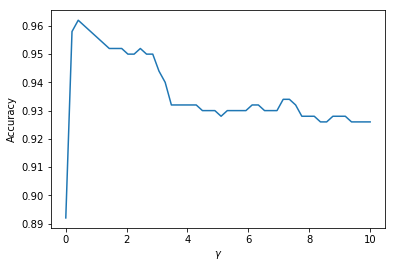

In [62]:
setGammas = np.linspace(0.005,10.0,50)

accuracies = []
for gamma in setGammas:
    clf = SVC( C = 0.001, gamma = gamma )
    accuracies.append( clf.fit( features, labels ).score(features, labels) )

pl.plot(setGammas, accuracies)

pl.ylabel(r'Accuracy')
pl.xlabel(r'$\gamma$')
pl.savefig('SVM_accuracyvsgamma.png', dpi=500)
pl.show()

## Banana dataset

In [63]:
bdataset = np.loadtxt('banana_dataset.csv', delimiter=',')
print("Shape of the bdataset: ", bdataset.shape )

Shape of the bdataset:  (300, 3)


In [64]:
bfeat = bdataset[:,1:]
blabl = bdataset[:,0]

In [65]:
clf = SVC( C = 0.001, gamma = gamma )
clf.fit( bfeat, blabl )
clf.score(bfeat, blabl)

0.53000000000000003

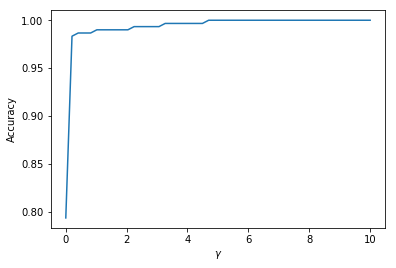

In [66]:
setGammas = np.linspace(0.005,10.0,50)

accuracies = []
for gamma in setGammas:
    clf = SVC( C = 10., gamma = gamma )
    accuracies.append( clf.fit( bfeat, blabl ).score(bfeat, blabl) )

pl.plot(setGammas, accuracies)

pl.ylabel(r'Accuracy')
pl.xlabel(r'$\gamma$')
pl.savefig('SVM_accuracyvsgamma.png', dpi=500)
pl.show()

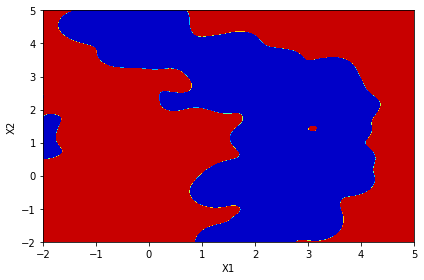

In [67]:
clf = SVC( C = 10., gamma = 10 )
clf.fit( bfeat, blabl )
plotContours(clf, 'SVC_decbound_bdataset1.png')

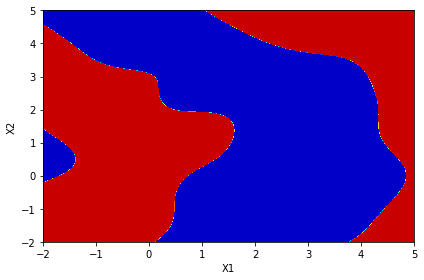

In [68]:
clf = SVC( C = 10., gamma = 1 )
clf.fit( bfeat, blabl )
plotContours(clf, 'SVC_decbound_bdataset2.png')